# Feature Engineering 

### *Required modules*

In [1]:
import numpy as np
import pandas as pd 

### *Loading data from folder* 

In [2]:
df = pd.read_csv('E:/Projects/red_wine/Data/Raw/winequality-red.csv')

### *Preview of dataset* 

In [3]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### *Converting label column value into two class "Good and Bad" based on rule*
### *if value < 7 then value = Bad else value = Good*

In [4]:
df['quality'] = df['quality'].apply(lambda x: "Good" if x > 6 else "Bad")

In [5]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Bad
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,Bad
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,Bad
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,Good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,Good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,Bad


### "Checking whether a dataset contains any null values or not" 

In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### *Checking whether a dataset containse duplicate value or not* 

In [7]:
df.duplicated().sum()

240

In [8]:
df.drop_duplicates(inplace=True, ignore_index = True)

In [9]:
df.duplicated().sum()

0

### *Checking whether a data is balanced data or not*
### *Means checking all label classes having good proportion in dataset*

In [10]:
df['quality'].value_counts()

quality
Bad     1175
Good     184
Name: count, dtype: int64

In [11]:
X = df.drop(['quality'], axis=1)
y = df['quality']

In [12]:
from imblearn.over_sampling import RandomOverSampler

In [13]:
over_sampler = RandomOverSampler(random_state = 42)
X_resampled, y_resampled = over_sampler.fit_resample(X, y)

In [14]:
from collections import Counter

In [15]:
Counter(y_resampled)

Counter({'Bad': 1175, 'Good': 1175})

In [16]:
X_resampled.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
5,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
6,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
7,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
8,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5
9,6.7,0.58,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2


In [17]:
X_resampled.shape

(2350, 11)

### *Outliers handling* 

In [18]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [21]:
def lower_upper_limit(data):
    cols = list(data.columns)
    
    for i in cols:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        
        IQR = Q3-Q1
        
        lower_limit = Q1-1.5*IQR
        upper_limit = Q3+1.5*IQR
        
        print("--------------------------------------------::for {} column::--------------------------------------------".format(i))
        print("First Quartile: {}".format(Q1))
        print("Third Quartile: {}".format(Q3))
        print("Lower limit: {:.2f}".format(lower_limit))
        print("Upper limit: {:.2f}".format(upper_limit))
        print("-"*100, end="\n\n\n")
        

In [22]:
lower_upper_limit(X_resampled)

--------------------------------------------::for fixed acidity column::--------------------------------------------
First Quartile: 7.2
Third Quartile: 9.8
Lower limit: 3.30
Upper limit: 13.70
----------------------------------------------------------------------------------------------------


--------------------------------------------::for volatile acidity column::--------------------------------------------
First Quartile: 0.33
Third Quartile: 0.59
Lower limit: -0.06
Upper limit: 0.98
----------------------------------------------------------------------------------------------------


--------------------------------------------::for citric acid column::--------------------------------------------
First Quartile: 0.12
Third Quartile: 0.47
Lower limit: -0.40
Upper limit: 0.99
----------------------------------------------------------------------------------------------------


--------------------------------------------::for residual sugar column::-------------------------------

### *Feature selection* 

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
feature_selector = RandomForestClassifier(n_estimators=340)
feature_selector.fit(X_resampled, y_resampled)

RandomForestClassifier(n_estimators=340)

In [25]:
importances = feature_selector.feature_importances_
importances

array([0.06788821, 0.11860772, 0.08638689, 0.05053813, 0.06275656,
       0.05167477, 0.07269456, 0.07724831, 0.05210417, 0.13621678,
       0.22388392])

In [27]:
final_df = pd.DataFrame({'features':pd.DataFrame(X_resampled).columns, 'importances':importances})

<Axes: >

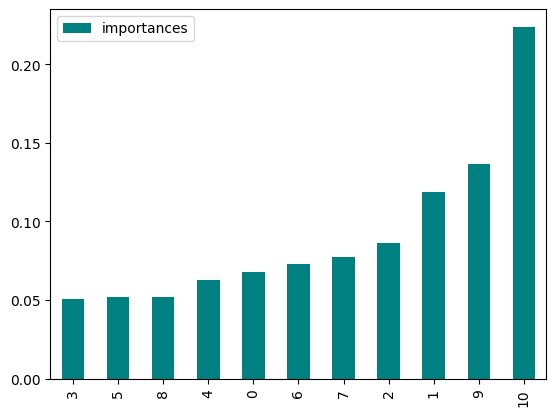

In [28]:
final_df = final_df.sort_values('importances')
final_df.plot.bar(color='teal')

#### *Feature selection by correlation method* 

In [29]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [30]:
corr_features = correlation(X_resampled, 0.7)
len(set(corr_features))

2

In [32]:
corr_features

{'citric acid', 'pH'}

In [33]:
X_resampled = X_resampled.drop(['citric acid'], axis=1)

In [34]:
X_resampled.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.66,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


### *scaling down dataset* 

In [35]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
scaler = MinMaxScaler()

In [37]:
scaler.fit(X_resampled)

MinMaxScaler()

In [38]:
scaled_data = scaler.transform(X_resampled)

In [39]:
print(scaled_data)

[[0.24778761 0.39726027 0.06849315 ... 0.60629921 0.13772455 0.15384615]
 [0.28318584 0.52054795 0.11643836 ... 0.36220472 0.20958084 0.21538462]
 [0.28318584 0.43835616 0.09589041 ... 0.40944882 0.19161677 0.21538462]
 ...
 [0.28318584 0.1369863  0.12328767 ... 0.46456693 0.26946108 0.4       ]
 [0.57522124 0.13013699 0.0890411  ... 0.22047244 0.2994012  0.38461538]
 [0.47787611 0.13013699 0.11643836 ... 0.48818898 0.28143713 0.32307692]]


### *Converting label categorical classes into numerical classes* 

In [40]:
y_resampled

0        Bad
1        Bad
2        Bad
3        Bad
4        Bad
        ... 
2345    Good
2346    Good
2347    Good
2348    Good
2349    Good
Name: quality, Length: 2350, dtype: object

In [41]:
y_resampled = y_resampled.apply(lambda x: 1 if x=="Bad" else "0")

In [42]:
y_resampled

0       1
1       1
2       1
3       1
4       1
       ..
2345    0
2346    0
2347    0
2348    0
2349    0
Name: quality, Length: 2350, dtype: object